**Extracting Dataset using the Kaggle API**

In [3]:
# configuring the path of the Kaggle.json file

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json


import os

os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()  # Use the current directory where kaggle.json is located


In [ ]:
!kaggle datasets list

^C


ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                           Car Price Dataset                                   135KB  2025-01-26 19:53:28           9590        127  1.0              
anandshaw2001/netflix-movies-and-tv-shows                          Netflix Movies and TV Shows                           1MB  2025-01-03 10:33:01          18380        465  1.0              
samithsachidanandan/most-popular-1000-youtube-videos               Most popular 1000 Youtube videos                     42KB  2025-01-27 18:36:29           2597         48  1.0              
adilshamim8/education-and-career-success     

Importing the Dog vs Cat Dataset form Kaggle

In [ ]:
#  Kaggle api
# !kaggle competitions download -c dogs-vs-cats -p "C:/Users/Dell/Downloads/dogs_and_cat_dataset"
!kaggle competitions download -c dogs-vs-cats 


dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls


dogs-vs-cats.zip
env
kaggle.json
main.ipynb
requirements.txt
sampleSubmission.csv
test1.zip
train
train.zip


In [2]:
#  extracting the compressed file of the dataset

from zipfile import ZipFile

dataset = "dogs-vs-cats.zip"

try:
    with ZipFile(dataset, 'r') as zip_ref:
        zip_ref.extractall()
        print("Dataset extracted successfully!")
except Exception as e:
    print(f"Error: {e}")

Dataset extracted successfully!


In [ ]:
#  extracting the compressed train file of the dataset
from zipfile import ZipFile

dataset = "train.zip"

try:
    with ZipFile(dataset, 'r') as zip_ref:
        zip_ref.extractall()
        print("Dataset extracted successfully!")
except Exception as e:
    print(f"Error: {e}")

Dataset extracted successfully!


In [ ]:
import os

# counting the number of files in the train folder
path, dirs, files = next(os.walk("train"))
file_count = len(files)
print("Number of images: ", file_count)

Number of images:  25000


Printing the name of images

In [ ]:
file_names = os.listdir("train")
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

Importing the dependencies

In [23]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

Displaying the image of the dogs and cats

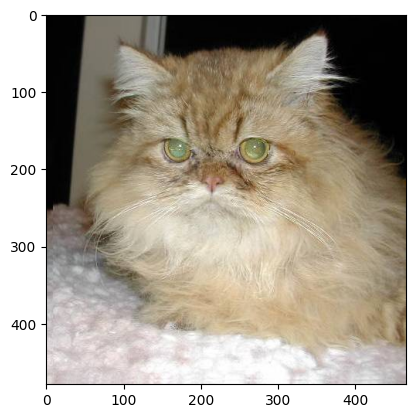

In [24]:
# display cat image
img = mpimg.imread("train\cat.1939.jpg")
imgplt = plt.imshow(img)
plt.show()

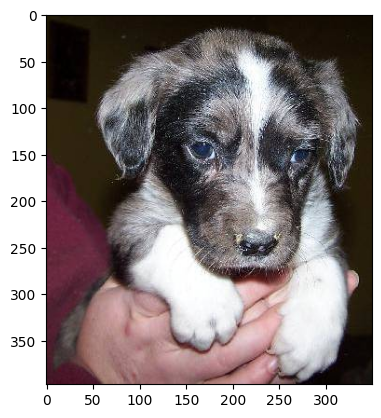

In [25]:
# display dog image
img = mpimg.imread("train\dog.1167.jpg")
imgplt = plt.imshow(img)
plt.show()

In [26]:
import os

file_names = os.listdir("train")

cnt_dog = 0
cnt_cat = 0

for i in range(len(file_names)):
    name = file_names[i]
    if name[0:3] == "dog":
        cnt_dog += 1
    else :
        cnt_cat += 1

print("No of cats is:", cnt_cat)
print("No of dogs is:", cnt_dog)

No of cats is: 12500
No of dogs is: 12500


Resizing all the images

In [27]:
#  creating a directory for the resized image

os.mkdir(r"C:\Users\Dell\Downloads\ALL PROJECTS\ML_PROJECTS\Dog_vs_cat_classifi_TF\image_resized")


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Dell\\Downloads\\ALL PROJECTS\\ML_PROJECTS\\Dog_vs_cat_classifi_TF\\image_resized'

In [28]:
original_folder = "train/"
resized_folder = "image_resized/"

for i in range(2000):

    filename = os.listdir(original_folder)[i]
    img_path = original_folder + filename

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    newImagePath = resized_folder + filename
    img.save(newImagePath)


for i in range(12500, 12500 + 2000):

    filename = os.listdir(original_folder)[i]
    img_path = original_folder + filename

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    newImagePath = resized_folder + filename
    img.save(newImagePath)



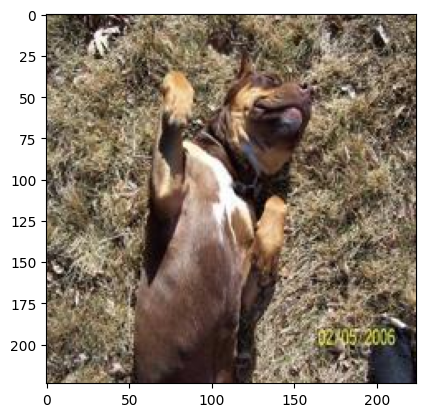

In [29]:
# displaying the resized dog image

img = mpimg.imread("image_resized\dog.11795.jpg")
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images for dogs and cats**

Cat -> 0
Dog -> 1

In [30]:
import os
# creating a for loopto assign labels
filenames = os.listdir("image_resized")

labels = []

for i in range(4000):

    file_name = filenames[i]
    label = file_name[0:3]

    if label == "dog":
        labels.append(1)
    else:
        labels.append(0)

In [31]:
print(filenames[0:5])
print(len(filenames))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
4000


In [32]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
4000


In [33]:
#  couting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[2000 2000]


Converting all the resized images into numpy arrays

In [34]:
import cv2
import glob
import numpy as np

In [35]:
image_directory = "image_resized/"
image_extension = ["png", "jpg"]

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_and_cats = np.asarray([cv2.imread(file) for file in files])

In [36]:
print(dog_and_cats)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [122 200 246]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [123 201 247]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 204 245]
   [123 202 245]
   [123 202 245]]

  ...

  [[ 55 123 160]
   [ 55 123 160]
   [ 56 124 161]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 53 121 158]
   [ 54 122 159]
   [ 55 123 160]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 52 120 157]
   [ 52 120 157]
   [ 53 121 158]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [185 205 210]
   [173 197 203]
   [164 192 199]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [180 200 205]
   [169 195 201]
   [167 195 202]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [172 192 197]
   [167 193 200]
   [171 198

In [37]:
print(dog_and_cats.shape)

(4000, 224, 224, 3)


In [38]:
X = dog_and_cats
Y = np.asarray(labels)

Train Test Split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(4000, 224, 224, 3) (3200, 224, 224, 3) (800, 224, 224, 3)


3200 -> training images
800 -> test images 

In [41]:
#  scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [42]:
print(X_train_scaled)


[[[[0.11372549 0.27058824 0.22745098]
   [0.10980392 0.27058824 0.21176471]
   [0.18039216 0.3372549  0.26666667]
   ...
   [0.15294118 0.25882353 0.15686275]
   [0.09019608 0.2        0.08627451]
   [0.02352941 0.13333333 0.01960784]]

  [[0.09411765 0.2627451  0.21960784]
   [0.1372549  0.30588235 0.24705882]
   [0.19607843 0.37647059 0.29019608]
   ...
   [0.15686275 0.2627451  0.16078431]
   [0.10196078 0.20784314 0.10588235]
   [0.03921569 0.14901961 0.03529412]]

  [[0.08627451 0.28627451 0.23137255]
   [0.15686275 0.36078431 0.29411765]
   [0.21176471 0.41568627 0.3254902 ]
   ...
   [0.16078431 0.26666667 0.16470588]
   [0.11372549 0.21960784 0.11764706]
   [0.05490196 0.16078431 0.05882353]]

  ...

  [[0.6        0.71372549 0.65490196]
   [0.61176471 0.7254902  0.66666667]
   [0.62745098 0.74117647 0.68235294]
   ...
   [0.41960784 0.44313725 0.4627451 ]
   [0.41960784 0.43137255 0.4627451 ]
   [0.41568627 0.42745098 0.45882353]]

  [[0.63921569 0.7254902  0.67843137]
   [0.6

**Building the neural netoeok**

In [43]:
import tensorflow as tf
import tensorflow_hub as hub

In [59]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def build_model():
    # Input layer
    inputs = layers.Input(shape=(224, 224, 3))
    
    # Feature extraction backbone (example: MobileNetV2)
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(224, 224, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze pretrained weights
    
    # Create proper feature extraction
    x = base_model(inputs)
    x = layers.GlobalAveragePooling2D()(x)
    
    # Add dense layers with meaningful parameters
    # x = layers.Dense(512, activation='relu')(x)
    # x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(2, activation='softmax')(x)
    
    return Model(inputs, outputs)

model = build_model()
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [60]:
# # Load the MobileNetV2 feature extractor
# mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
# pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable=False)

In [61]:
# Number of output classes
# num_of_classes = 2

# # Build the model
# model = tf.keras.Sequential([
#     pretrained_model,
#     tf.keras.layers.Dense(num_of_classes, activation="softmax")  # Use softmax for classification
# ])

# # Display the model summary     
# model.summary()

In [62]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)


In [63]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 477ms/step - accuracy: 0.8714 - loss: 0.2839
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 481ms/step - accuracy: 0.9772 - loss: 0.0649
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 477ms/step - accuracy: 0.9803 - loss: 0.0613
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 461ms/step - accuracy: 0.9803 - loss: 0.0574
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 427ms/step - accuracy: 0.9872 - loss: 0.0370


In [64]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test data loss = ", loss)
print("Test accuacy = ", accuracy)

c:\Users\Dell\Downloads\ALL PROJECTS\ML_PROJECTS\Dog_vs_cat_classifi_TF\env\lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 481ms/step - accuracy: 0.9716 - loss: 0.0782
Test data loss =  0.07971705496311188
Test accuacy =  0.9750000238418579


**Predictive System**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[0.02931007 0.9706899 ]]
The image represents the image of the dog


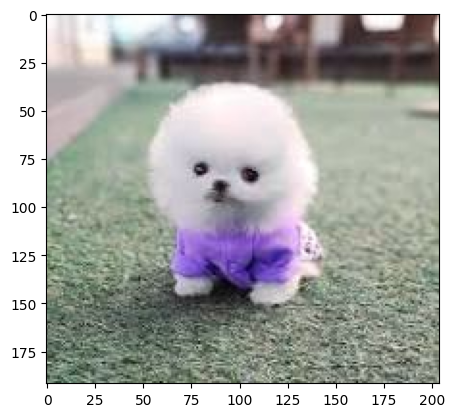

In [72]:
input_image_path = input("Path of image to be predicted: ")

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resize = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0 :
    print("The miage represents the image of the cat")
else:
    print("The image represents the image of the dog")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[0.9957539  0.00424615]]
The image represents the image of the cat


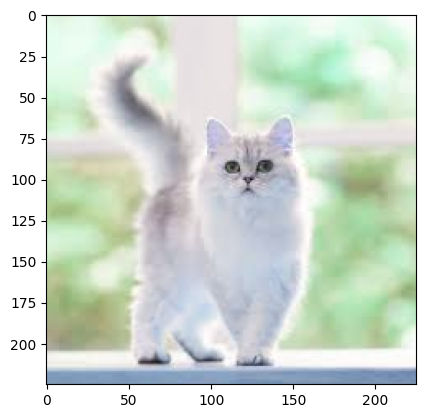

In [74]:
input_image_path = input("Path of image to be predicted: ")

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

input_image_resize = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0 :
    print("The image represents the image of the cat")
else:
    print("The image represents the image of the dog")

**Saving the model**

In [75]:
model.save("model.h5")
print("Model saved successfully")

Model saved successfully
